In [28]:
# coding: utf-8

# our all
import numpy as np
import pandas as pd

# usefull pandas settings
pd.set_option('display.max_rows', 45000)
pd.set_option('display.max_columns', 50000)
pd.set_option('display.max_colwidth', 5000)

# for API working and current time
import requests
import datetime

# chess pgn-reading tool
from pgn_parser import pgn, parser

# multistreaming
import threading

# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

In [29]:
user_list=['andreyvict', 'sever043', 'Rosolimo']
user=user_list[2]

In [30]:
user

'Rosolimo'

In [31]:
df=pd.read_csv('data/cur_user.csv')
df=df[df['target_user']==user]

In [61]:
df.sample(4)

,Unnamed: 0,Unnamed: 0.1,rules,time_class,time_control,rated,game,result,date,time,period,white.username,black.username,white.rating,black.rating,white.result,black.result,white.score,black.score,white_elo_forecast,black_elo_forecast,eco,eco_url,game_url,white_url,black_url,target_user,score,rating,opponent_rating,base_elo_forec,color,year,month,elo_dif
5160,250,0,chess,blitz,180+2,True,1,0-1,2018-12-31,14:01:01,2018-12,Rosolimo,olaf1000,1615,1694,checkmated,win,0.0,1.0,0.388229,0.611771,D37,https://www.chess.com/openings/D37-Queens-Gambit-Declined-Three-Knights-Variation-4...Be7-5.e3,https://www.chess.com/live/game/3338152037,https://api.chess.com/pub/player/rosolimo,https://api.chess.com/pub/player/olaf1000,Rosolimo,0.0,1694,1694,0.388229,w,2018,12,0
4486,235,0,chess,blitz,300,True,1,0-1,2013-10-25,11:30:51,2013-10,DC01,Rosolimo,1529,1520,timeout,win,0.0,1.0,0.512949,0.487051,B13,https://www.chess.com/openings/B13-Caro-Kann-Defense-Exchange-Variation-3...cxd5,https://www.chess.com/live/game/630187915,https://api.chess.com/pub/player/dc01,https://api.chess.com/pub/player/rosolimo,Rosolimo,1.0,1529,1529,0.487051,b,2013,10,0
8278,3,0,chess,blitz,180+2,True,1,1-0,2017-11-10,08:59:49,2017-11,Ariues,Rosolimo,1591,1596,win,resigned,1.0,0.0,0.492805,0.507195,A45,https://www.chess.com/openings/A45-Indian-Game,https://www.chess.com/live/game/2420596825,https://api.chess.com/pub/player/ariues,https://api.chess.com/pub/player/rosolimo,Rosolimo,0.0,1591,1591,0.507195,b,2017,11,0
3513,234,0,chess,blitz,300,True,1,0-1,2016-03-01,07:27:20,2016-3,aruges,Rosolimo,1593,1621,timeout,win,0.0,1.0,0.459792,0.540208,C10,https://www.chess.com/openings/C10-French-Defense-Rubinstein-Blackburne-Defense,https://www.chess.com/live/game/1481689778,https://api.chess.com/pub/player/aruges,https://api.chess.com/pub/player/rosolimo,Rosolimo,1.0,1593,1593,0.540208,b,2016,3,0


In [58]:
df['elo_dif']=df['rating']-df['opponent_rating']

In [63]:
df.groupby('elo_dif').sum()[['game', 'score']]

,game,score
elo_dif,,
0,11504,5676.5


In [51]:
np.sum(df['game'])

11504

In [52]:
np.sum(df['score'])

5676.5

In [53]:
np.sum(df['score'])/np.sum(df['game'])

0.49343706536856746

In [54]:
cl=df.groupby(['color']).sum()[['game', 'score']].reset_index()
cl['ef']=cl['score']/cl['game']

In [55]:
cl

,color,game,score,ef
0,b,5748,2806.0,0.488170
1,w,5756,2870.5,0.498697


In [49]:
ec=df.groupby(['color', 'eco', 'eco_url']).sum()[['game', 'score']].reset_index()
ec['ef']=ec['score']/ec['game']
ec=ec.sort_values(by=['color', 'game'], ascending=False)

In [50]:
ec

,color,eco,eco_url,game,score,ef
906,w,D10,https://www.chess.com/openings/D10-Slav-Defense-3.Nc3,438,225.5,0.514840
923,w,D20,https://www.chess.com/openings/D20-Queens-Gambit-Accepted-Old-Variation,373,223.5,0.599196
930,w,D30,https://www.chess.com/openings/D30-Queens-Gambit-Declined,292,143.0,0.489726
952,w,D31,https://www.chess.com/openings/D31-Queens-Gambit-Declined-Semi-Slav-Defense-Accelerated-Move-Order,144,66.0,0.458333
969,w,D35,https://www.chess.com/openings/D35-Queens-Gambit-Declined-Queens-Knight-Variation-3...Nf6,111,61.0,0.549550
932,w,D30,https://www.chess.com/openings/D30-Queens-Gambit-Declined-3.Nf3-Nf6,110,49.5,0.450000
694,w,A40,https://www.chess.com/openings/A40-Queens-Pawn-Opening-Horwitz-Defense-2.c4,99,46.5,0.469697
879,w,D06,https://www.chess.com/openings/D06-Queens-Gambit-Declined-Marshall-Defense,86,50.5,0.587209
810,w,A85,https://www.chess.com/openings/A85-Dutch-Defense-Queens-Knight-Variation,84,40.0,0.476190
683,w,A40,https://www.chess.com/openings/A40-Modern-Defense-with-1-d4-2.c4-Bg7-3.Nc3,83,44.5,0.536145


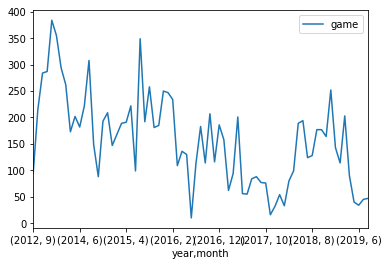

In [34]:
df.groupby(['year', 'month']).sum()[['game']].plot()

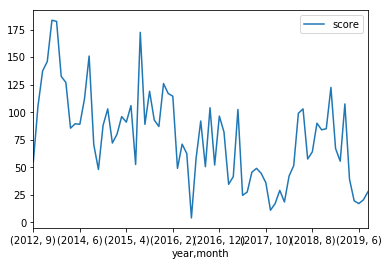

In [35]:
df.groupby(['year', 'month']).sum()[['score']].plot()

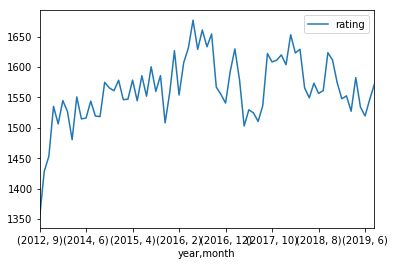

In [39]:
df.groupby(['year', 'month']).mean()[['rating']].plot()

In [45]:
df.groupby(['rules', 'rated', 'time_class', 'time_control']).sum()[['game', 'score']]

game   score
rules rated time_class time_control              
chess False blitz      180              2     0.0
                       180+2           26     7.5
                       300              1     1.0
                       300+2            3     1.5
                       300+3           10     2.0
                       600             29     9.0
      True  blitz      180             61    39.5
                       180+2         3894  1963.0
                       300           7304  3568.0
                       300+2            7     1.5
                       300+3            4     2.0
                       600            156    76.5
            bullet     120+1            7     5.0